In [78]:
import pandas as pd
import numpy as np
import datetime

In [79]:
import data_process as dp
import data_process_tools as dpt

import importlib
importlib.reload(dp)
importlib.reload(dpt)

<module 'data_process_tools' from '/Users/andrewmo/Documents/Docs - Jupiter/Library/1_Personal/data processing/data_process_tools.py'>

In [80]:
data = {
    'int_column': [1, 2, 3, 4, 5],
    'float_column': [1.1, 2.2, 3.3, 4.4, 5.5],
    'str_column': ['apple', 'banana', 'orange', 'grape', 'melon'],
    'bool_column': [True, False, True, False, True],
    'datetime_column': [datetime.datetime(2023, 1, 1),
                        datetime.datetime(2023, 2, 1),
                        datetime.datetime(2023, 3, 1),
                        datetime.datetime(2023, 4, 1),
                        datetime.datetime(2023, 5, 1)],
    'timedelta_column': [pd.Timedelta(days=i) for i in range(5)],
    'category_column': pd.Categorical(['A', 'B', 'C', 'A', 'B']),
    'object_column': [np.nan, 'string', 123, True, None]
}

df = pd.DataFrame(data)
print(df)

   int_column  float_column str_column  bool_column datetime_column  \
0           1           1.1      apple         True      2023-01-01   
1           2           2.2     banana        False      2023-02-01   
2           3           3.3     orange         True      2023-03-01   
3           4           4.4      grape        False      2023-04-01   
4           5           5.5      melon         True      2023-05-01   

  timedelta_column category_column object_column  
0           0 days               A           NaN  
1           1 days               B        string  
2           2 days               C           123  
3           3 days               A          True  
4           4 days               B          None  


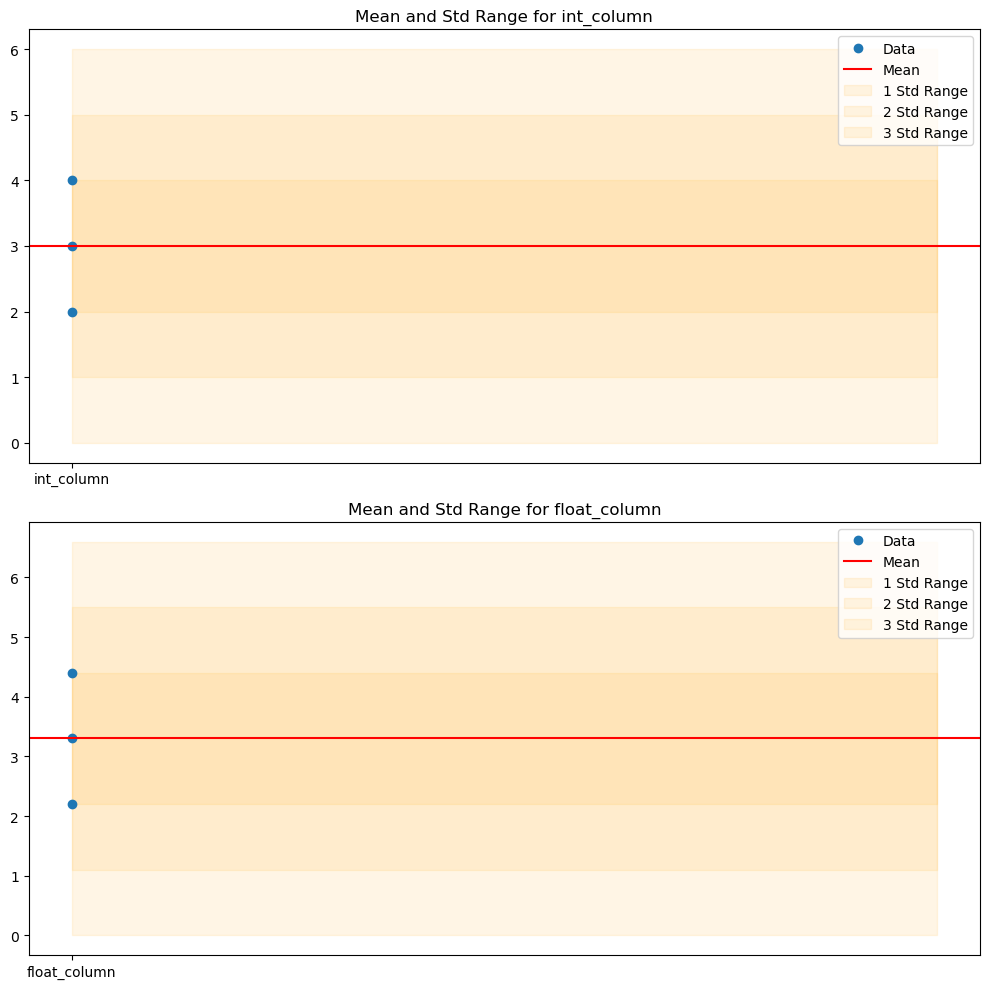

Index(['int_column', 'float_column'], dtype='object')
Index(['int_column', 'float_column'], dtype='object')


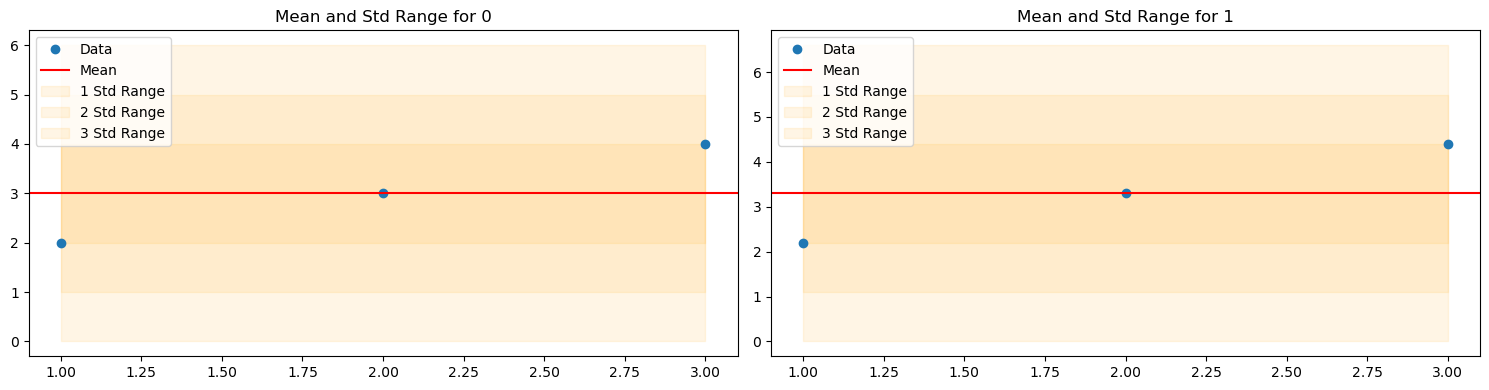

/Users/andrewmo/opt/anaconda3/envs/usual/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


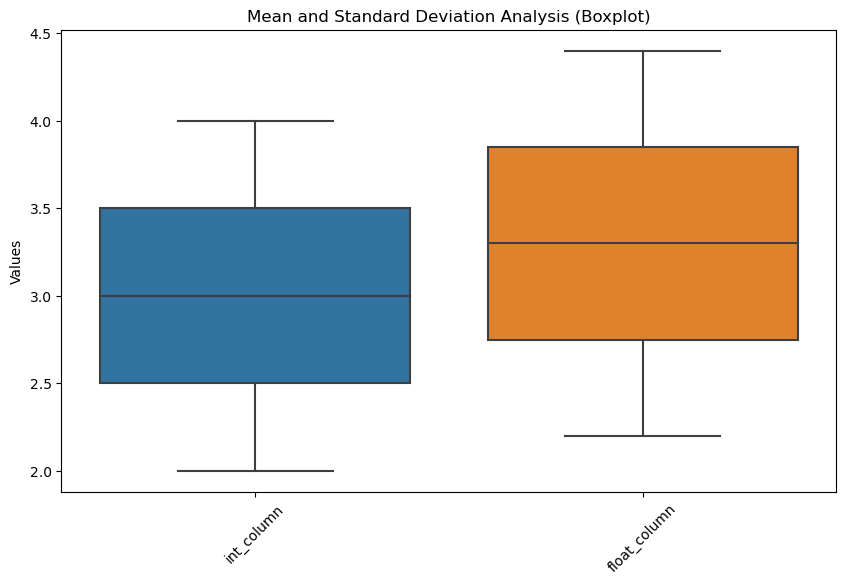

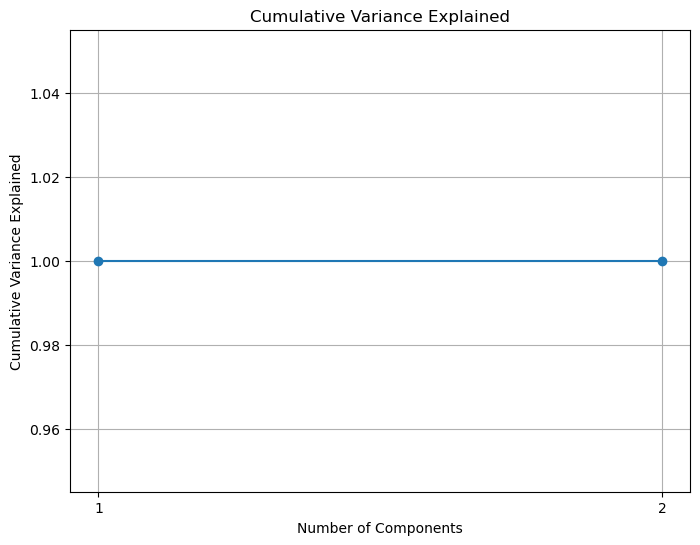

In [109]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class DataAnalyzer:
    def __init__(self, dataframe):
        self.data = dataframe.copy()
        self.numeric_columns = self.get_numeric_columns()
        self.pca = None

    def get_numeric_columns(self):
        numeric_columns = self.data.select_dtypes(include=['float64', 'int64']).columns
        return numeric_columns.tolist()

    def clean_data(self):
        self.data = self.data[self.numeric_columns].dropna()

    def mean_std_analysis(self):
        mean_values = self.data.mean()
        std_values = self.data.std()
        return mean_values, std_values

    def perform_pca(self):
        pca = PCA()
        pca.fit(self.data[self.numeric_columns])
        self.pca = pca


    def visualize_mean_std_boxplot(self):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.data)
        plt.title('Mean and Standard Deviation Analysis (Boxplot)')
        plt.xticks(rotation=45)
        plt.ylabel('Values')
        plt.show()


    def visualize_cumulative_variance(self):
        explained_variance = self.pca.explained_variance_ratio_
        cumulated_variance = np.cumsum(explained_variance)

        plt.figure(figsize=(8, 6))
        plt.plot(cumulated_variance, marker='o', linestyle='-')
        plt.title('Cumulative Variance Explained')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Variance Explained')
        plt.xticks(np.arange(len(explained_variance)), np.arange(1, len(explained_variance) + 1))
        plt.grid()
        plt.show()


    def visualize_mean_std_individual_with_ranges(self, mean_values, std_values):
        num_cols = len(mean_values)

        fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5*num_cols))

        for i, col in enumerate(mean_values.index):
            ax = axes[i] if num_cols > 1 else axes
            ax.plot([col] * len(self.data), self.data[col], 'o', label='Data')
            ax.axhline(mean_values[col], color='red', label='Mean')

            for j in range(1, 4):  # Plotting 1, 2, and 3 std ranges
                ax.fill_between(
                    range(len(self.data)),
                    mean_values[col] - j * std_values[col],
                    mean_values[col] + j * std_values[col],
                    alpha=0.1,
                    color='orange',
                    label=f'{j} Std Range'
                )

            ax.set_title(f'Mean and Std Range for {col}')
            ax.legend()

        plt.tight_layout()
        plt.show()

    def visualize_mean_std(self, mean_values, std_values):
        num_cols = len(mean_values)
        num_plots_per_row = min(num_cols, 4)
        num_rows = (num_cols - 1) // num_plots_per_row + 1

        fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows), squeeze=False)
        print(mean_values.index)
        print(self.data.columns)
        for i, data_col in enumerate(mean_values.index):
            row = i // num_plots_per_row
            col = i % num_plots_per_row

            ax = axes[row, col]
            ax.plot(self.data.index, self.data[data_col], 'o', label='Data')
            ax.axhline(mean_values[col], color='red', label='Mean')

            for j in range(1, 4):  # Plotting 1, 2, and 3 std ranges
                ax.fill_between(
                    self.data.index,
                    mean_values[col] - j * std_values[col],
                    mean_values[col] + j * std_values[col],
                    alpha=0.1,
                    color='orange',
                    label=f'{j} Std Range'
                )

            ax.set_title(f'Mean and Std Range for {col}')
            ax.legend()

        plt.tight_layout()
        plt.show()



# Example usage
data = df
analyzer = DataAnalyzer(data)

analyzer.clean_data()
mean_vals, std_vals = analyzer.mean_std_analysis()

analyzer.perform_pca()
analyzer.visualize_mean_std_individual_with_ranges(mean_vals, std_vals)
analyzer.visualize_mean_std_individual_with_ranges_side_by_side(mean_vals, std_vals)
analyzer.visualize_mean_std_boxplot()
analyzer.visualize_cumulative_variance()


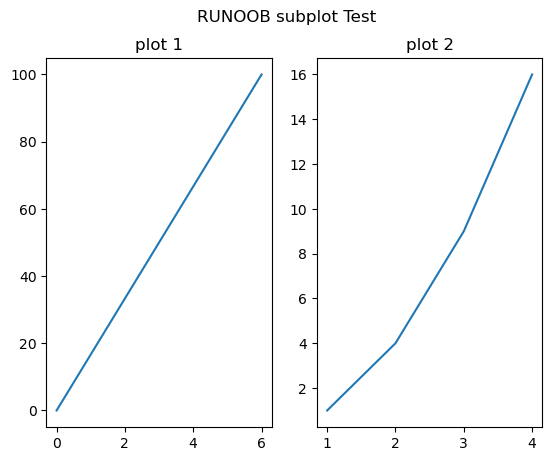

In [107]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
xpoints = np.array([0, 6])
ypoints = np.array([0, 100])

plt.subplot(1, 2, 1)
plt.plot(xpoints,ypoints)
plt.title("plot 1")

#plot 2:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.subplot(1, 2, 2)
plt.plot(x,y)
plt.title("plot 2")

plt.suptitle("RUNOOB subplot Test")
plt.show()